In [54]:
# Main data packages. 
import numpy as np
import pandas as pd

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from darts import TimeSeries
from darts.models import ExponentialSmoothing, VARIMA, NBEATSModel, TFTModel, LinearRegressionModel

In [55]:
df = pd.read_csv('../data/data_combined.csv')

In [56]:
df.date = pd.to_datetime(df.date)

In [57]:
df.describe()

,turnover,year,month,week,day_of_month,day_of_week,temp_mean,temp_min,temp_max,temp_std,...,rain_1h_06-10,rain_1h_11_15,rain_1h_16_20,snow_1h_mean,snow_1h_min,snow_1h_max,snow_1h_std,snow_1h_06-10,snow_1h_11_15,snow_1h_16_20
count,52892.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,...,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.00000,52895.000000
mean,478.090163,2016.413442,6.574289,26.791190,15.731770,3.004121,13.345626,9.614445,15.995961,2.040910,...,0.120816,0.151750,0.170464,0.007283,0.000040,0.065930,0.018210,0.006345,0.00407,0.011434
std,506.824089,2.850544,3.467385,15.147277,8.791724,2.001800,8.881946,7.884645,9.588843,1.019983,...,0.502450,0.570153,0.731305,0.083611,0.002357,1.152641,0.298003,0.076709,0.03713,0.223568
min,3.111802,2012.000000,1.000000,1.000000,1.000000,0.000000,-10.665333,-14.250000,-7.960000,0.109249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,163.216660,2014.000000,4.000000,13.000000,8.000000,1.000000,6.158667,3.310000,8.170000,1.242077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,270.341768,2016.000000,7.000000,27.000000,16.000000,3.000000,13.152000,9.290000,15.950000,1.990857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,546.429821,2019.000000,10.000000,40.000000,23.000000,5.000000,20.585667,16.210000,23.710000,2.735313,...,0.050000,0.084000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,3263.457675,2021.000000,12.000000,53.000000,31.000000,6.000000,33.171333,27.400000,38.110000,6.070505,...,11.226000,11.154000,18.796000,2.946000,0.140000,43.690000,11.271828,3.708000,0.92400,8.738000


In [58]:
df.head()

,date,branch,product,turnover,year,month,week,day_of_month,day_of_week,school_holiday,...,snow_1h_min,snow_1h_max,snow_1h_std,snow_1h_06-10,snow_1h_11_15,snow_1h_16_20,condition_total,condition_6-10,condition_11-15,condition_16-20
0,2012-01-01,Metro,Mischbrote,134.735759,2012.0,1.0,52.0,1.0,6.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
1,2012-01-01,Metro,Weizenbrötchen,150.104897,2012.0,1.0,52.0,1.0,6.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
2,2012-01-01,Metro,klassischer Kuchen,322.635866,2012.0,1.0,52.0,1.0,6.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
3,2012-01-01,Metro,handliches Gebäck,1047.327119,2012.0,1.0,52.0,1.0,6.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
4,2012-01-01,Metro,herzhafter Snack,816.663466,2012.0,1.0,52.0,1.0,6.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54795 entries, 0 to 54794
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              54795 non-null  datetime64[ns]
 1   branch            54795 non-null  object        
 2   product           54795 non-null  object        
 3   turnover          52892 non-null  float64       
 4   year              52895 non-null  float64       
 5   month             52895 non-null  float64       
 6   week              52895 non-null  float64       
 7   day_of_month      52895 non-null  float64       
 8   day_of_week       52895 non-null  float64       
 9   school_holiday    52895 non-null  object        
 10  public_holiday    52895 non-null  object        
 11  lock              52895 non-null  object        
 12  temp_mean         52895 non-null  float64       
 13  temp_min          52895 non-null  float64       
 14  temp_max          5289

# Darts

In [60]:
df_darts = df[df.year<2020].query('branch=="Metro" and product=="Mischbrote"')
df_darts.tail(10)

,date,branch,product,turnover,year,month,week,day_of_month,day_of_week,school_holiday,...,snow_1h_min,snow_1h_max,snow_1h_std,snow_1h_06-10,snow_1h_11_15,snow_1h_16_20,condition_total,condition_6-10,condition_11-15,condition_16-20
43680,2019-12-22,Metro,Mischbrote,188.939133,2019.0,12.0,51.0,22.0,6.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,cloudy,['cloudy' 'rainy'],rainy
43695,2019-12-23,Metro,Mischbrote,282.942562,2019.0,12.0,52.0,23.0,0.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,cloudy
43710,2019-12-24,Metro,Mischbrote,221.121285,2019.0,12.0,52.0,24.0,1.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,rainy
43725,2019-12-25,Metro,Mischbrote,182.267218,2019.0,12.0,52.0,25.0,2.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,cloudy,rainy
43740,2019-12-26,Metro,Mischbrote,300.141229,2019.0,12.0,52.0,26.0,3.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
43755,2019-12-27,Metro,Mischbrote,253.567150,2019.0,12.0,52.0,27.0,4.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
43770,2019-12-28,Metro,Mischbrote,239.912878,2019.0,12.0,52.0,28.0,5.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,['rainy' 'snowy'],cloudy
43785,2019-12-29,Metro,Mischbrote,193.543545,2019.0,12.0,52.0,29.0,6.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
43800,2019-12-30,Metro,Mischbrote,318.625967,2019.0,12.0,1.0,30.0,0.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,rainy,cloudy
43815,2019-12-31,Metro,Mischbrote,155.710255,2019.0,12.0,1.0,31.0,1.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,['cloudy' 'rainy'],cloudy,cloudy


In [61]:
series = TimeSeries.from_dataframe(df_darts, 'date', 'turnover', freq='D', fill_missing_dates=True)[-365*4:-365]

In [62]:
train, val = series[:-365], series[-365:]

In [63]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

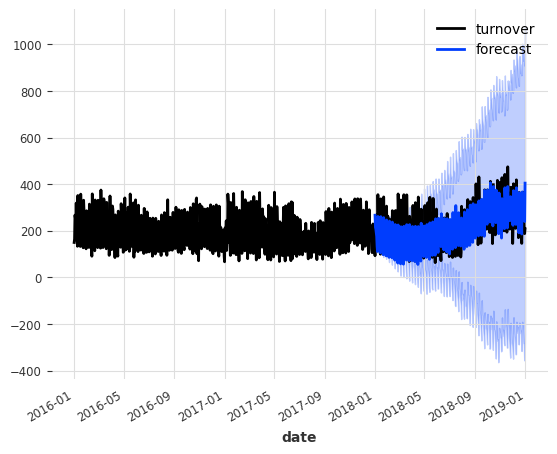

In [64]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.45, high_quantile=0.55)
plt.legend()

# Darts II

Ok, we _might_ need the unstacked dataset after all

In [65]:
def unstack_time_series(df, index, groups, target):
    
    # create the individual combinations df
    df_groups = df.pivot(index=index, columns=groups, values=target)
    df_groups.columns = df_groups.columns.to_flat_index().map('{0[0]} | {0[1]}'.format)

    # create df for first group, use agg(pd.Series.sum) instead of .sum to enable skipna, otherwise NaN rows will add up to 0
    df_01 = df.groupby([index, groups[0]])[target] \
                        .agg(pd.Series.sum, skipna=False) \
                        .reset_index(drop=False) \
                        .pivot(index=index, columns=groups[0], values=target)

    # create df for second group
    df_02 = df.groupby([index, groups[1]])[target] \
                        .agg(pd.Series.sum, skipna=False)\
                        .reset_index(drop=False) \
                        .pivot(index=index, columns=groups[1], values=target)

    # create the total level df
    df_total = df.groupby(index)[target] \
                .agg(pd.Series.sum, skipna=False)\
                .to_frame() \
                .rename(columns={target: 'total'})

    # join the DataFrames
    df_unstacked = df_total.join(df_01) \
                                .join(df_02) \
                                .join(df_groups)
    df_unstacked.index = pd.to_datetime(df_unstacked.index)
    return df_unstacked


In [66]:
df_unstacked = unstack_time_series(df, 'date', ['branch', 'product'], 'turnover')[:'2020-01-01'].reset_index()

## Prediction with Hierarchy

Create hierarchy for targets

In [67]:
#create variables
df['product'].unique()

array(['Mischbrote', 'Weizenbrötchen', 'klassischer Kuchen',
       'handliches Gebäck', 'herzhafter Snack'], dtype=object)

In [68]:
from itertools import product

hierarchy = dict()

# Fill in grouping by branch
for branch in df.branch.unique():
    hierarchy[branch] = ["total"]

# Fill in grouping by product
for good in df['product'].unique():
    hierarchy[good] = ["total"]

# Fill in grouping by (product, branch)
for good, branch in product(df['product'].unique(), df.branch.unique()):
    hierarchy["{} | {}".format(branch, good)] = [branch, good]


In [69]:
hierarchy

{'Metro': ['total'],
 'Center': ['total'],
 'Train_Station': ['total'],
 'Mischbrote': ['total'],
 'Weizenbrötchen': ['total'],
 'klassischer Kuchen': ['total'],
 'handliches Gebäck': ['total'],
 'herzhafter Snack': ['total'],
 'Metro | Mischbrote': ['Metro', 'Mischbrote'],
 'Center | Mischbrote': ['Center', 'Mischbrote'],
 'Train_Station | Mischbrote': ['Train_Station', 'Mischbrote'],
 'Metro | Weizenbrötchen': ['Metro', 'Weizenbrötchen'],
 'Center | Weizenbrötchen': ['Center', 'Weizenbrötchen'],
 'Train_Station | Weizenbrötchen': ['Train_Station', 'Weizenbrötchen'],
 'Metro | klassischer Kuchen': ['Metro', 'klassischer Kuchen'],
 'Center | klassischer Kuchen': ['Center', 'klassischer Kuchen'],
 'Train_Station | klassischer Kuchen': ['Train_Station', 'klassischer Kuchen'],
 'Metro | handliches Gebäck': ['Metro', 'handliches Gebäck'],
 'Center | handliches Gebäck': ['Center', 'handliches Gebäck'],
 'Train_Station | handliches Gebäck': ['Train_Station', 'handliches Gebäck'],
 'Metro | h

In [70]:
targets = ['total', 'Center', 'Metro', 'Train_Station', 'Mischbrote',
       'Weizenbrötchen', 'handliches Gebäck', 'herzhafter Snack',
       'klassischer Kuchen', 'Metro | Mischbrote', 'Metro | Weizenbrötchen',
       'Metro | klassischer Kuchen', 'Metro | handliches Gebäck',
       'Metro | herzhafter Snack', 'Center | Mischbrote',
       'Center | Weizenbrötchen', 'Center | klassischer Kuchen',
       'Center | handliches Gebäck', 'Center | herzhafter Snack',
       'Train_Station | Mischbrote', 'Train_Station | Weizenbrötchen',
       'Train_Station | klassischer Kuchen',
       'Train_Station | handliches Gebäck', 'Train_Station | herzhafter Snack']

In [71]:
#df_nona = df_unstacked.fillna(1)

In [72]:
#create TimeSeries with hierarchy
series = TimeSeries.from_dataframe(df=df_unstacked, time_col='date', value_cols=targets, hierarchy=hierarchy)

from darts.utils import missing_values

series = missing_values.fill_missing_values(series, fill='auto')

In [73]:
train, val = series[:-365], series[-365:]

In [74]:
model = LinearRegressionModel(lags=365)
model.fit(train)
pred = model.predict(n=len(val))

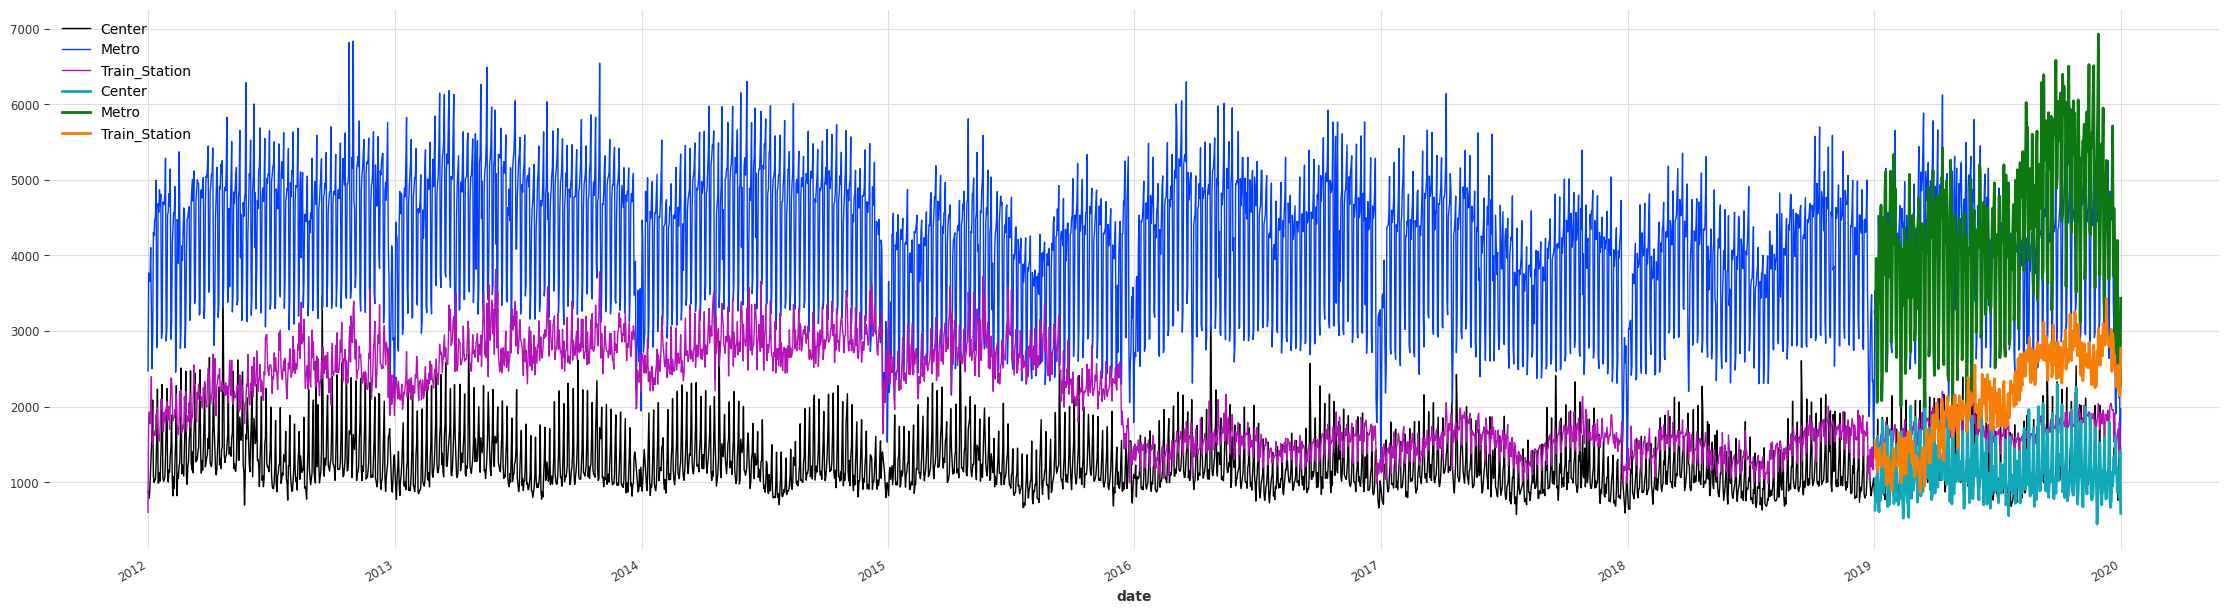

In [75]:
#series.plot()
components_to_show = ['Center', 'Metro', 'Train_Station']
plt.figure(figsize=(28, 7))
series[components_to_show].plot(lw=1)
pred[components_to_show].plot(lw=2)

In [76]:
print('mape:',round(mape(val,pred),4))
print('rmse:',round(rmse(val, pred),4))

mape: 30.7109
rmse: 299.3083


## Prediction with Covariates (weather data, hintedy-hint!)

Add weather data

In [77]:
weather_stats = pd.read_csv('../data/summary_stats.csv')
weather_stats.date = pd.to_datetime(weather_stats.date)

In [78]:
df_joined = df_unstacked.merge(weather_stats, on=['date'], how='left')
df_joined.head()

,date,total,Center,Metro,Train_Station,Mischbrote,Weizenbrötchen,handliches Gebäck,herzhafter Snack,klassischer Kuchen,...,snow_1h_min,snow_1h_max,snow_1h_std,snow_1h_06-10,snow_1h_11_15,snow_1h_16_20,condition_total,condition_6-10,condition_11-15,condition_16-20
0,2012-01-01,NaN,NaN,2471.467108,599.950181,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
1,2012-01-02,6493.082889,870.486146,3768.404747,1854.191996,545.500710,518.078139,1962.239146,2811.054385,656.210509,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,foggy,cloudy,cloudy
2,2012-01-03,6440.640373,788.594800,3724.716100,1927.329473,509.877749,504.396758,2033.488867,2803.195766,589.681233,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,clear
3,2012-01-04,6389.457134,962.075238,3654.981774,1772.400122,574.427179,476.991802,2030.888666,2592.911780,714.237707,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
4,2012-01-05,7276.173807,1196.347843,4104.150267,1975.675697,796.452364,576.031498,2151.078068,2969.482034,783.129843,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,cloudy,rainy,rainy


In [79]:
df_joined[(df_joined.date>'2019-10-01')&(df_joined.date<'2019-10-30')]

,date,total,Center,Metro,Train_Station,Mischbrote,Weizenbrötchen,handliches Gebäck,herzhafter Snack,klassischer Kuchen,...,snow_1h_min,snow_1h_max,snow_1h_std,snow_1h_06-10,snow_1h_11_15,snow_1h_16_20,condition_total,condition_6-10,condition_11-15,condition_16-20
2831,2019-10-02,7423.547386,1050.574259,4534.999950,1837.973177,738.584131,632.951106,2645.611995,2523.840321,882.559833,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,['cloudy' 'rainy'],rainy,rainy
2832,2019-10-03,7453.842204,1025.724356,4666.468739,1761.649109,682.798063,623.088276,2542.822314,2470.106354,1135.027198,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
2833,2019-10-04,8439.706906,1291.182282,5270.512469,1878.012155,674.795351,648.457374,3110.035281,2885.357891,1121.061008,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
2834,2019-10-05,5982.714003,1426.879324,2859.176137,1696.658541,702.945663,418.416082,2242.459567,1547.061448,1071.831243,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
2835,2019-10-06,6892.794719,2228.501288,3031.504471,1632.788960,771.331366,485.335651,2932.098215,1148.729676,1555.299812,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy
2836,2019-10-07,7285.342126,1098.749597,4415.926893,1770.665635,900.973685,620.873094,2616.883205,2283.398225,863.213917,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,clear
2837,2019-10-08,7435.949552,1065.601520,4568.662054,1801.685978,645.833756,612.392115,2692.304850,2464.610595,1020.808236,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,rainy
2838,2019-10-09,7668.956023,1078.384065,4815.219422,1775.352537,732.258523,595.704417,2676.861873,2639.135228,1024.995983,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,rainy
2839,2019-10-10,7807.864340,1070.936521,5003.242841,1733.684978,664.305836,605.904799,2781.655766,2698.554826,1057.443114,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,clear
2840,2019-10-11,8631.449192,1219.845747,5491.539240,1920.064206,732.672129,613.341478,3098.637646,2989.555795,1197.242144,...,0.0,0.0,0.0,0.0,0.0,0.0,cloudy,cloudy,cloudy,cloudy


In [80]:
from darts.utils import missing_values

series = missing_values.fill_missing_values(series, fill='auto')

good to go!

Let's create a covariate series

In [81]:
df_joined.columns

Index(['date', 'total', 'Center', 'Metro', 'Train_Station', 'Mischbrote',
       'Weizenbrötchen', 'handliches Gebäck', 'herzhafter Snack',
       'klassischer Kuchen', 'Metro | Mischbrote', 'Metro | Weizenbrötchen',
       'Metro | klassischer Kuchen', 'Metro | handliches Gebäck',
       'Metro | herzhafter Snack', 'Center | Mischbrote',
       'Center | Weizenbrötchen', 'Center | klassischer Kuchen',
       'Center | handliches Gebäck', 'Center | herzhafter Snack',
       'Train_Station | Mischbrote', 'Train_Station | Weizenbrötchen',
       'Train_Station | klassischer Kuchen',
       'Train_Station | handliches Gebäck', 'Train_Station | herzhafter Snack',
       'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_06-10',
       'temp_11_15', 'temp_16_20', 'feels_like_mean', 'feels_like_min',
       'feels_like_max', 'feels_like_std', 'feels_like_06-10',
       'feels_like_11_15', 'feels_like_16_20', 'pressure_mean', 'pressure_min',
       'pressure_max', 'pressure_std', 'pressur

In [82]:
#create covariate series
covariates = TimeSeries.from_dataframe(df=df_joined, time_col='date', value_cols=['temp_mean', 'clouds_mean', 'rain_1h_mean', 'snow_1h_mean'])

covariates = missing_values.fill_missing_values(series, fill='auto')

In [83]:
model = LinearRegressionModel(lags=[-7,-365], lags_future_covariates=[0])
model.fit(train, future_covariates=covariates)
pred = model.predict(n=len(val), future_covariates=covariates)

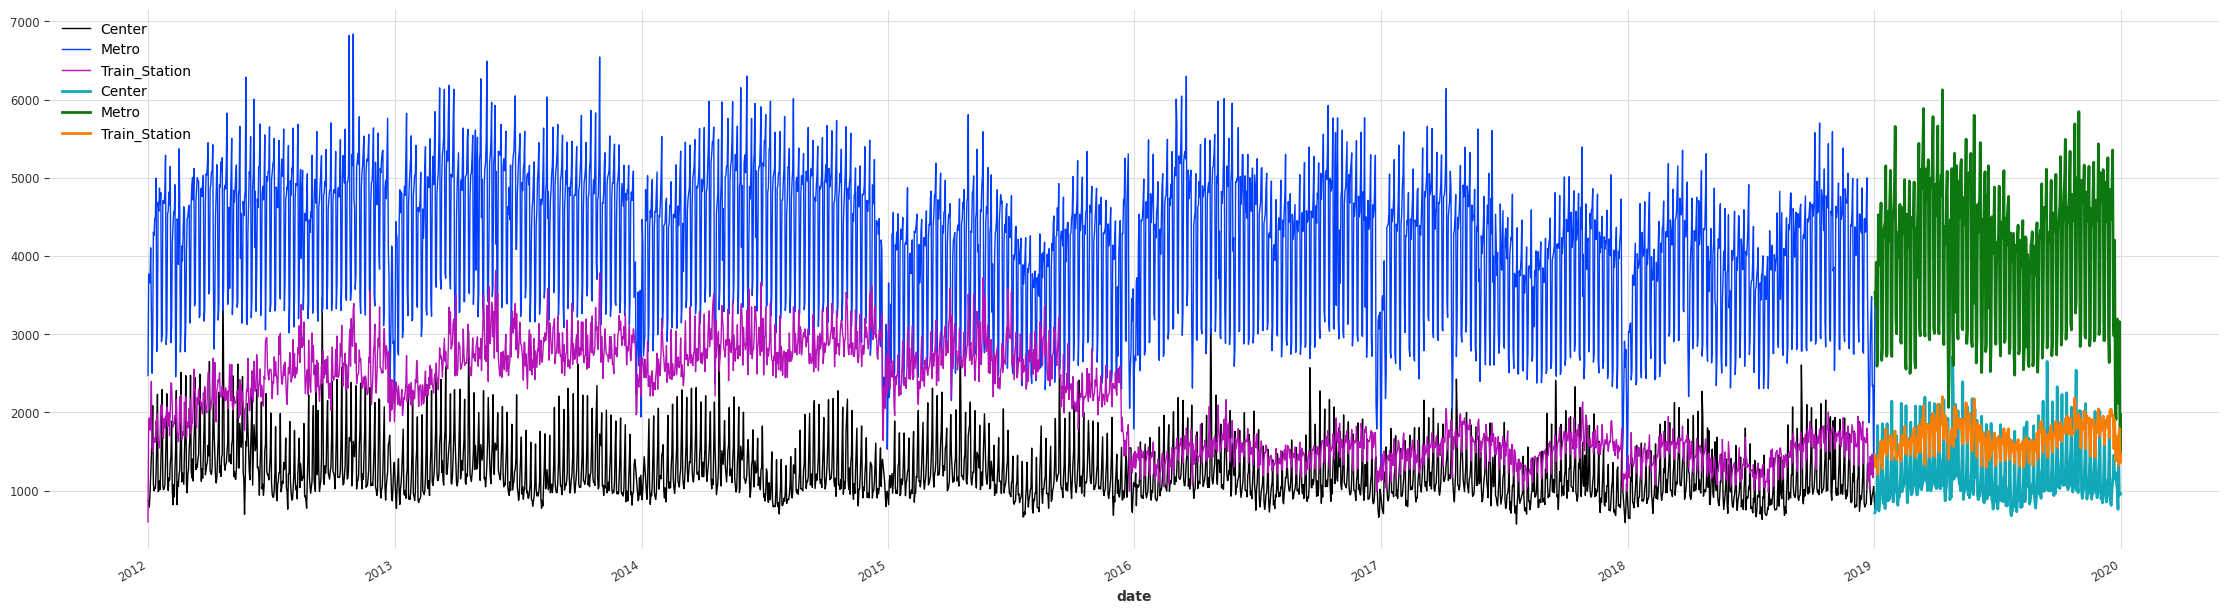

In [87]:
#series.plot()
#components_to_show = ['Center', 'Metro', 'Train_Station']
plt.figure(figsize=(28, 7))
series[components_to_show].plot(lw=1)
pred[components_to_show].plot(lw=2)
#plt.ylim((-2000,8000))
#plt.xlim((0,30))

In [85]:
from darts.metrics import rmse, mape

In [86]:
print('mape:',round(mape(val,pred),4))
print('rmse:',round(rmse(val, pred),4))

mape: 0.0162
rmse: 1.008
